In [164]:
import pandas as pd

project_path = '/home/wjunneng/Ubuntu/2019-CDA-Product-Marketing-Model-Construction-And-Forecasting'

df_test_path = project_path + '/data/original/df_test.csv'
df_training_path = project_path + '/data/original/df_training.csv'

df_test = pd.read_csv(df_test_path, encoding='utf-8')
df_training = pd.read_csv(df_training_path, encoding='utf-8')

In [165]:
import numpy as np

df_training.replace('?', np.nan, inplace=True)
df_training.isnull().sum()

df_test.replace('?', np.nan, inplace=True)
df_test.isnull().sum()

ID                                      0
'Product using score'                 541
'User area'                           587
gender                                589
age                                   564
'Cumulative using time'               569
'Point balance'                       591
'Product service usage'               590
'Pay a monthly fee by credit card'    628
'Active user'                         584
' Estimated salary'                   601
'Purchase or not'                       0
dtype: int64

In [166]:
df_test.columns

Index(['ID', ''Product using score'', ''User area'', 'gender', 'age',
       ''Cumulative using time'', ''Point balance'', ''Product service usage'',
       ''Pay a monthly fee by credit card'', ''Active user'',
       '' Estimated salary'', ''Purchase or not''],
      dtype='object')

In [167]:
df_test['ID'].values

array([9222, 3931, 1242, ..., 7007, 9849, 9228])

In [168]:
df_training.sort_values(by='ID', inplace=True)
df_test.sort_values(by='ID', inplace=True)

df_training.set_index(keys='ID', inplace=True)
# del df_training['ID']

df_test.set_index(keys='ID', inplace=True)
# del df_test['ID']


df_training_1 = df_training[df_training["'Purchase or not'"] == 1]
df_training_0 = df_training[df_training["'Purchase or not'"] == 0]
df_training_1.replace(np.nan, -1, inplace=True)
df_training_0.replace(np.nan, -1, inplace=True)

df_test.replace(np.nan, -1, inplace=True)

for df in [df_training_0, df_training_1, df_test]:
    column = 'gender'
    
    df[column] = df[column].apply(lambda x: 1 if x == "Male" else x)
    df[column] = df[column].apply(lambda x: 2 if x == "Female" else x)
    
    column = "'User area'"
    
    df[column] = df[column].apply(lambda x: 1 if x == "Taipei" else x)
    df[column] = df[column].apply(lambda x: 2 if x == "Taichung" else x)
    df[column] = df[column].apply(lambda x: 3 if x == "Tainan" else x)
    
del df_training_0["'Purchase or not'"]
del df_training_1["'Purchase or not'"]
del df_test["'Purchase or not'"]

/home/wjunneng/Python/anaconda3/envs/lightgbm/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/wjunneng/Python/anaconda3/envs/lightgbm/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/wjunneng/Python/anaconda3/envs/lightgbm/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [169]:
pd.concat([df_training_0.head(5), df_training_1.tail(5)])

,'Product using score','User area',gender,age,'Cumulative using time','Point balance','Product service usage','Pay a monthly fee by credit card','Active user',' Estimated salary'
ID,,,,,,,,,,
4,699,-1,-1,-1,-1,0,2,-1,0,-1
7,822,1,1,50,7,0,2,1,1,10062.8
9,501,1,1,44,-1,-1,2,0,1,74940.5
10,684,-1,-1,27,-1,134603.88,1,1,-1,71725.73
11,-1,1,-1,31,6,102016.72,2,0,-1,80181.12
9961,795,2,2,-1,9,-1,1,-1,1,120853.83
9976,610,2,1,50,-1,113957.01,2,1,0,196526.55
9982,498,2,1,42,-1,-1,1,1,-1,-1
9992,597,1,2,53,4,88381.21,1,-1,-1,-1


'Product using score'


/home/wjunneng/Python/anaconda3/envs/lightgbm/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/wjunneng/Python/anaconda3/envs/lightgbm/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


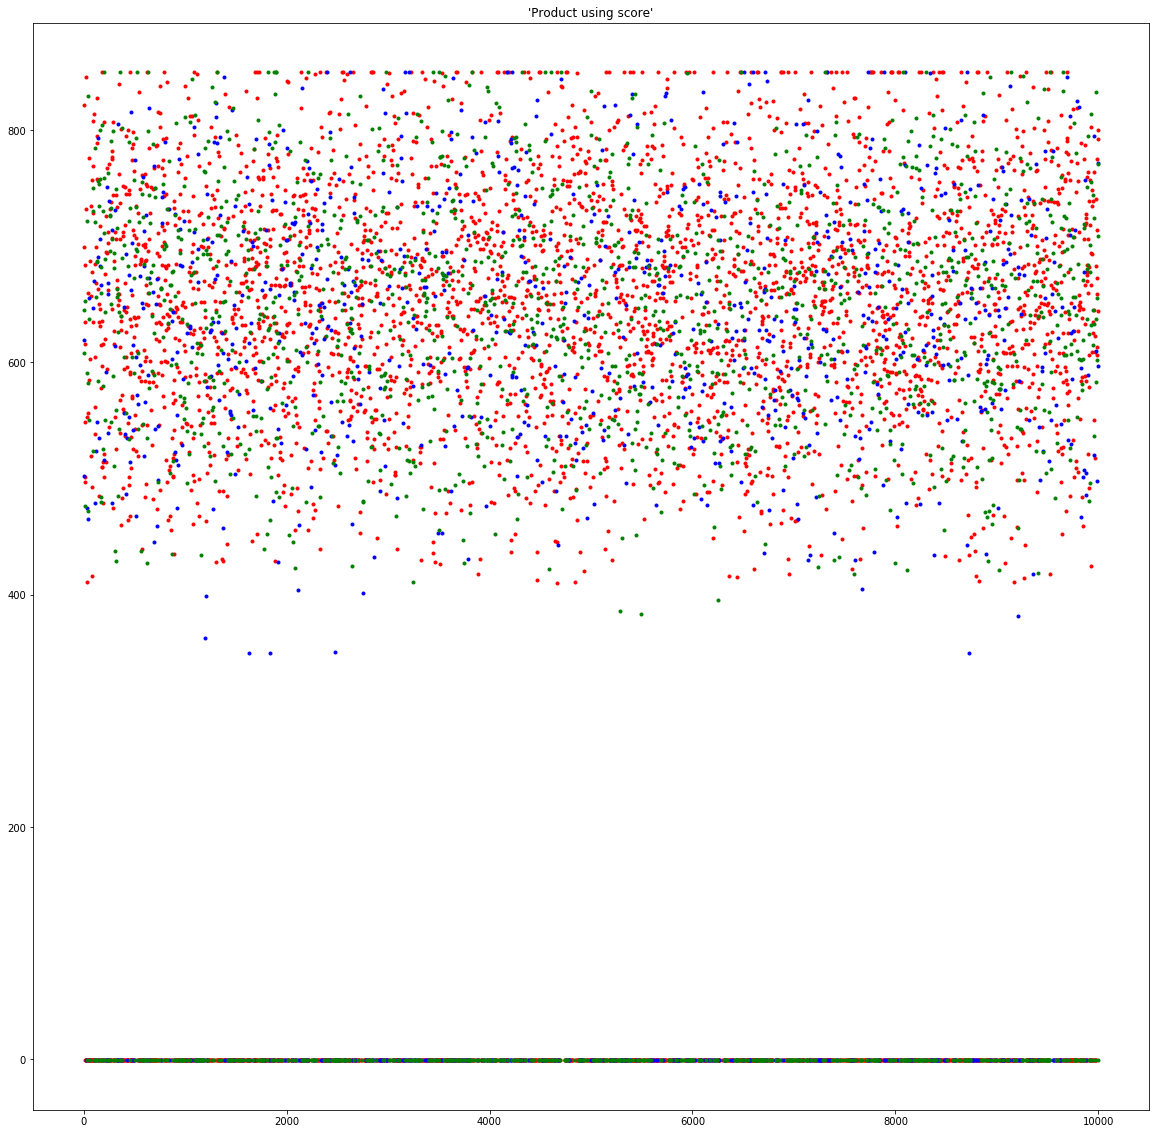

'User area'


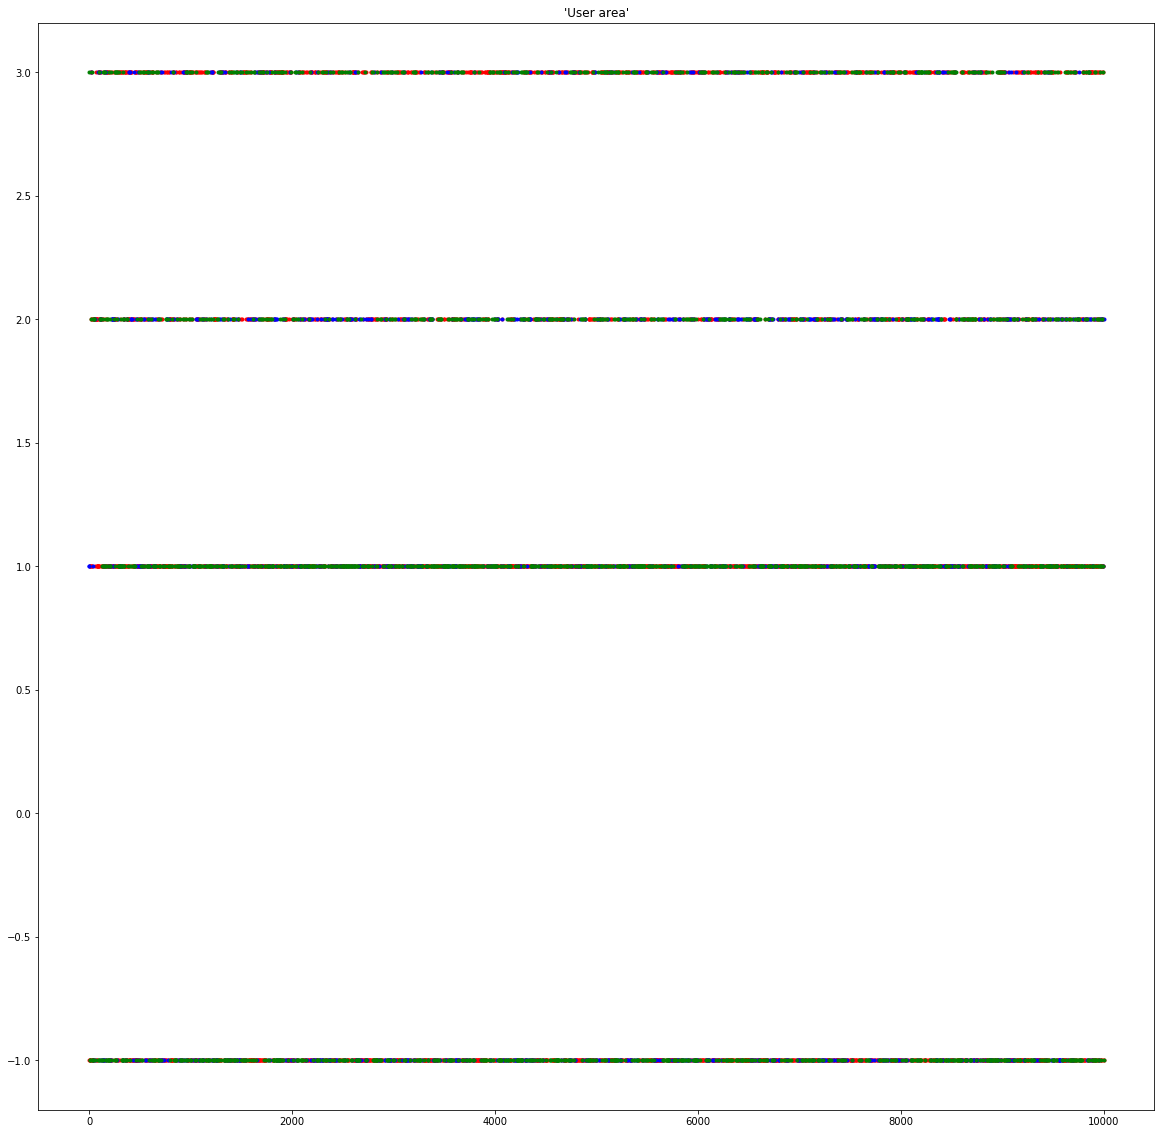

gender


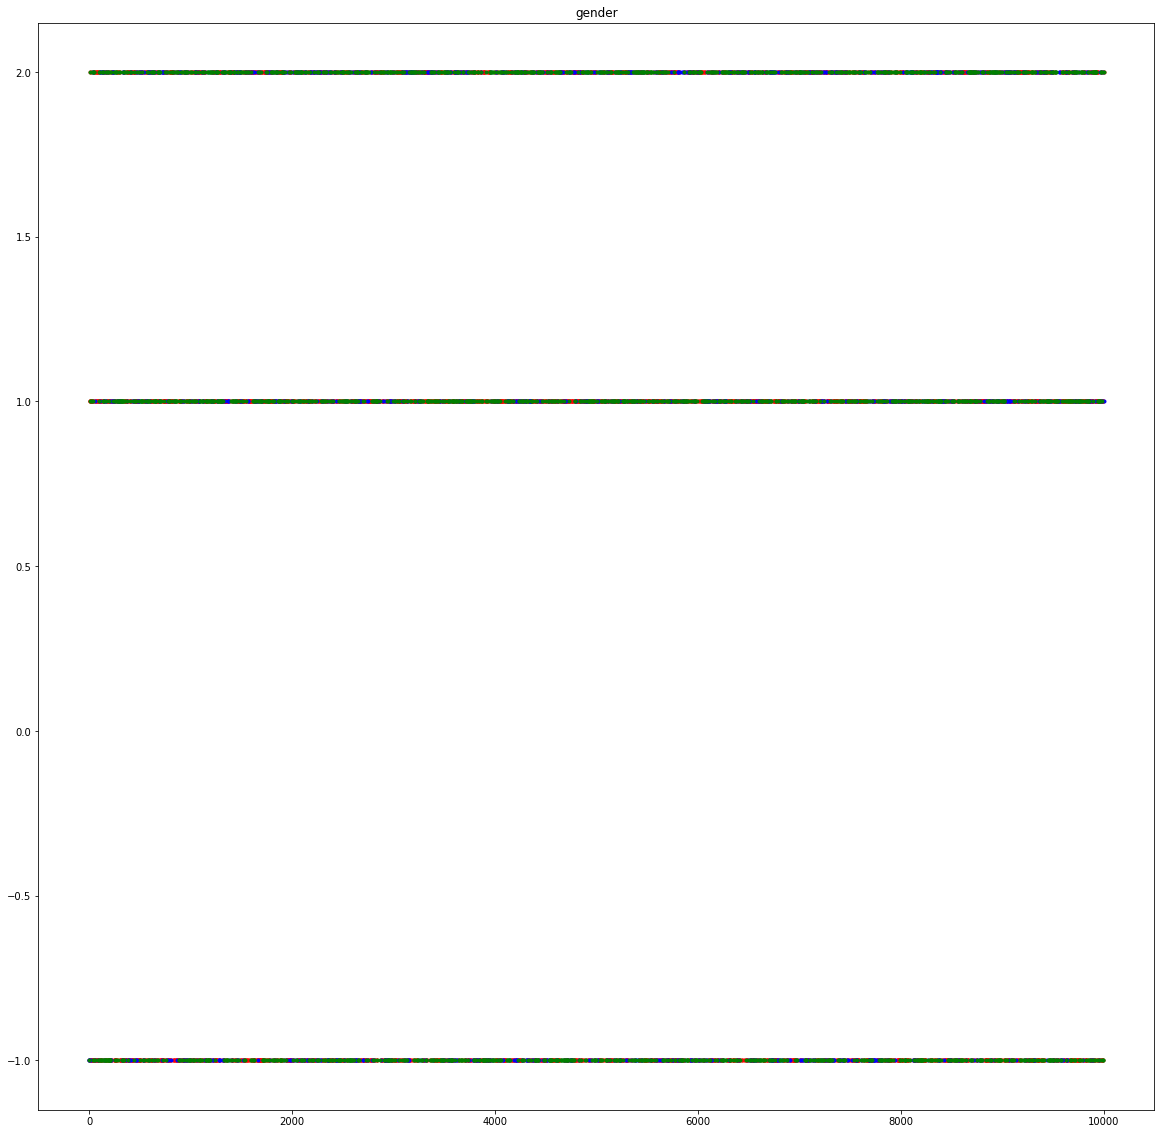

age


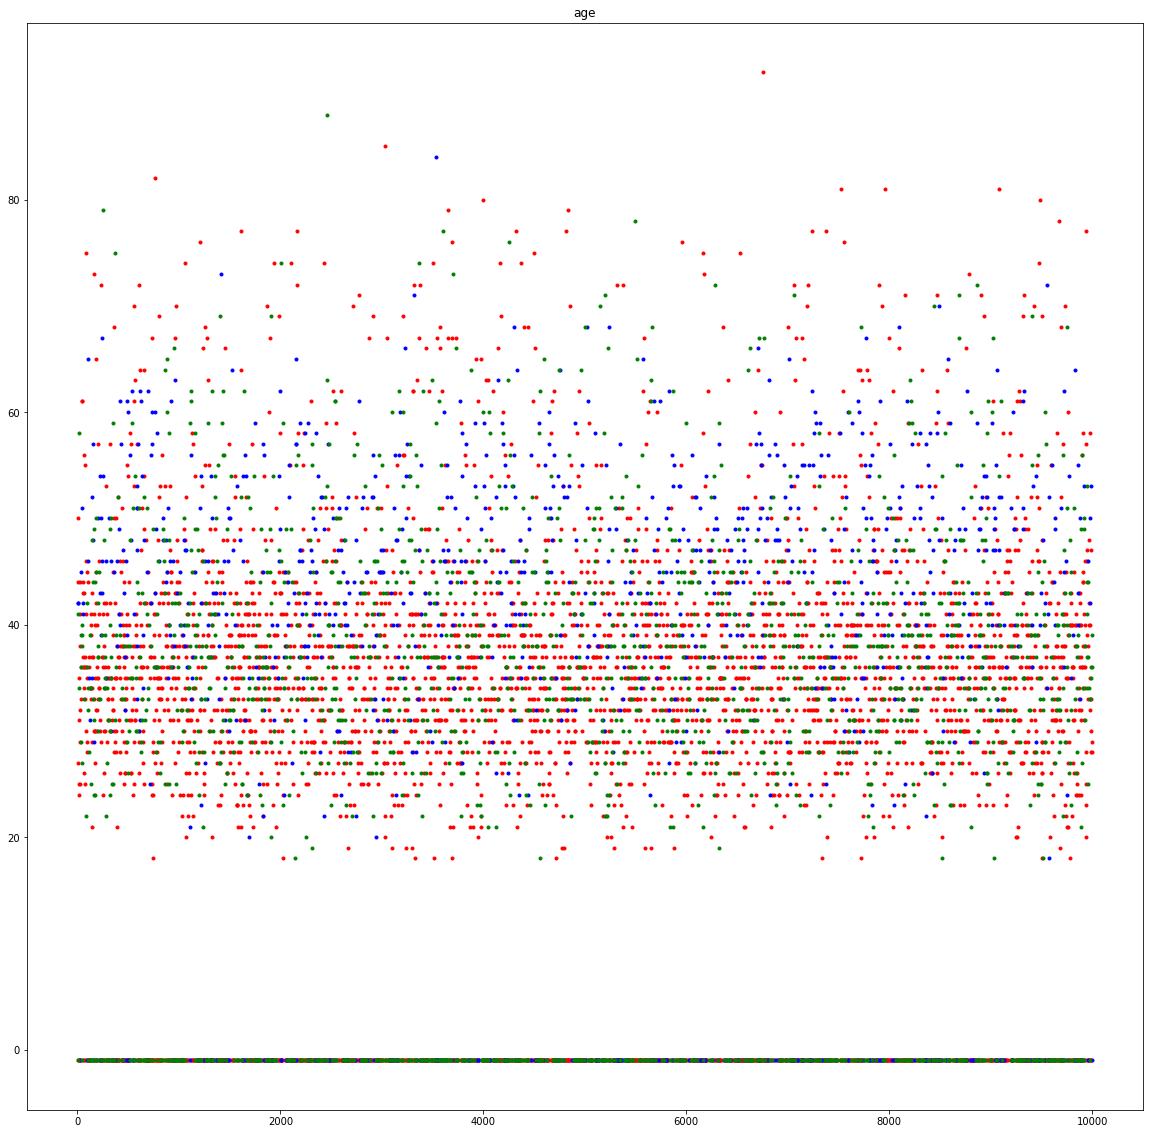

'Cumulative using time'


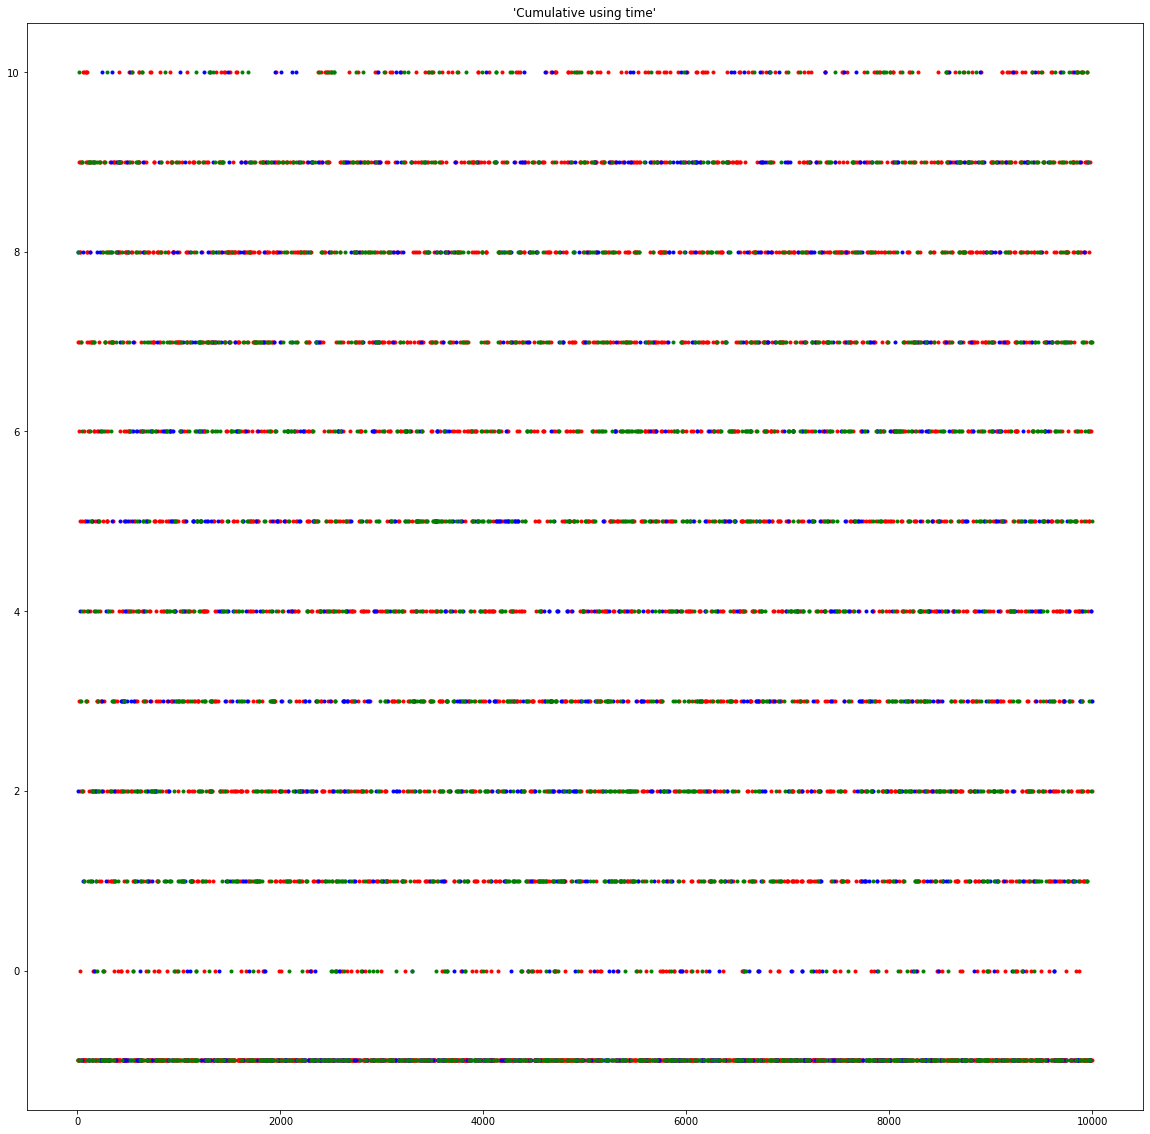

'Point balance'
'Point balance'


/home/wjunneng/Python/anaconda3/envs/lightgbm/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/wjunneng/Python/anaconda3/envs/lightgbm/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


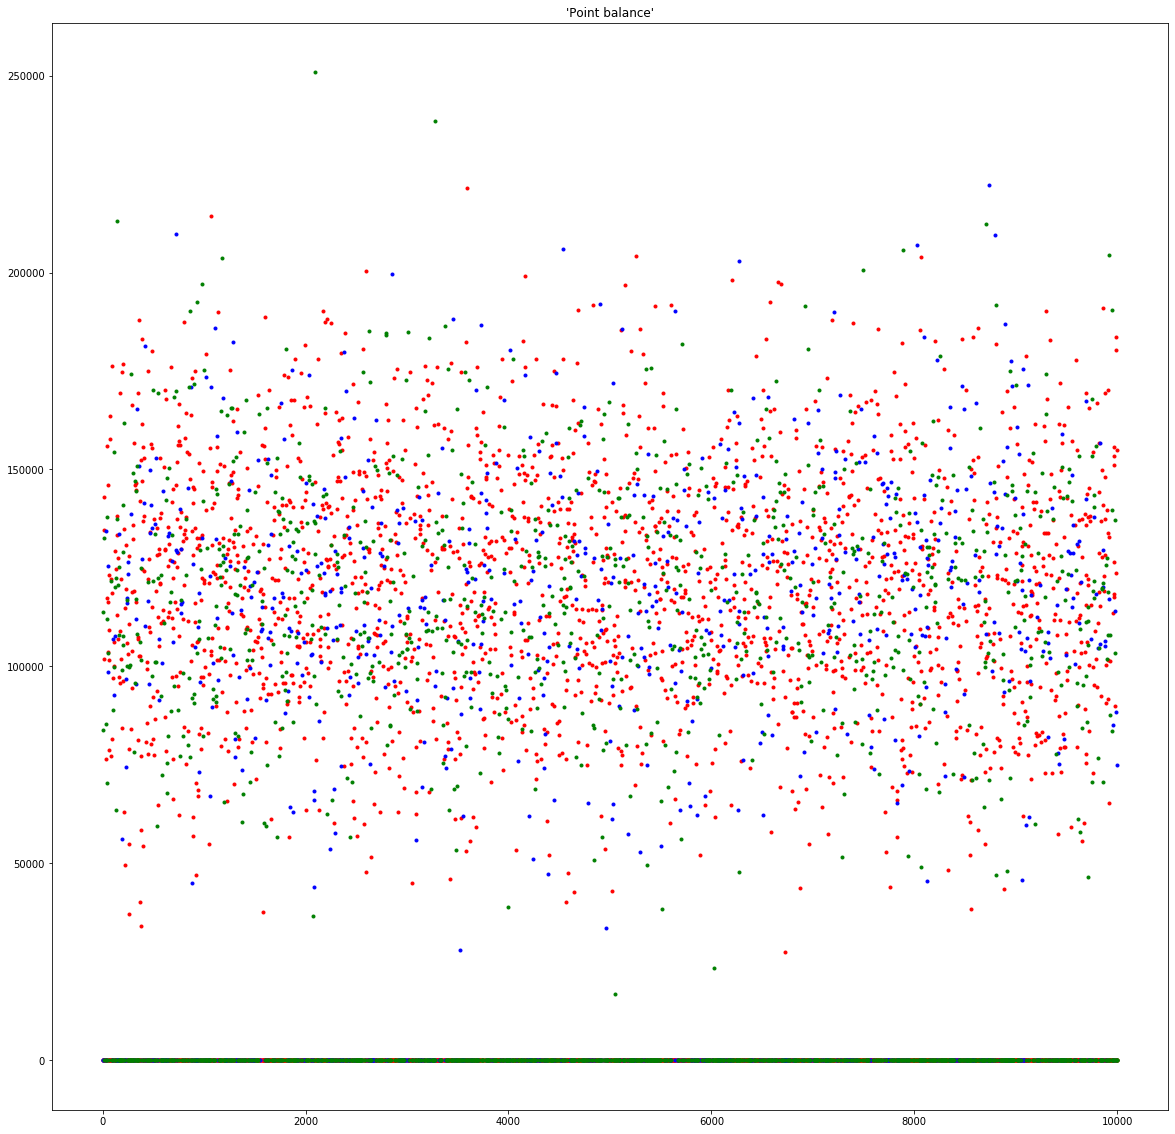

'Product service usage'


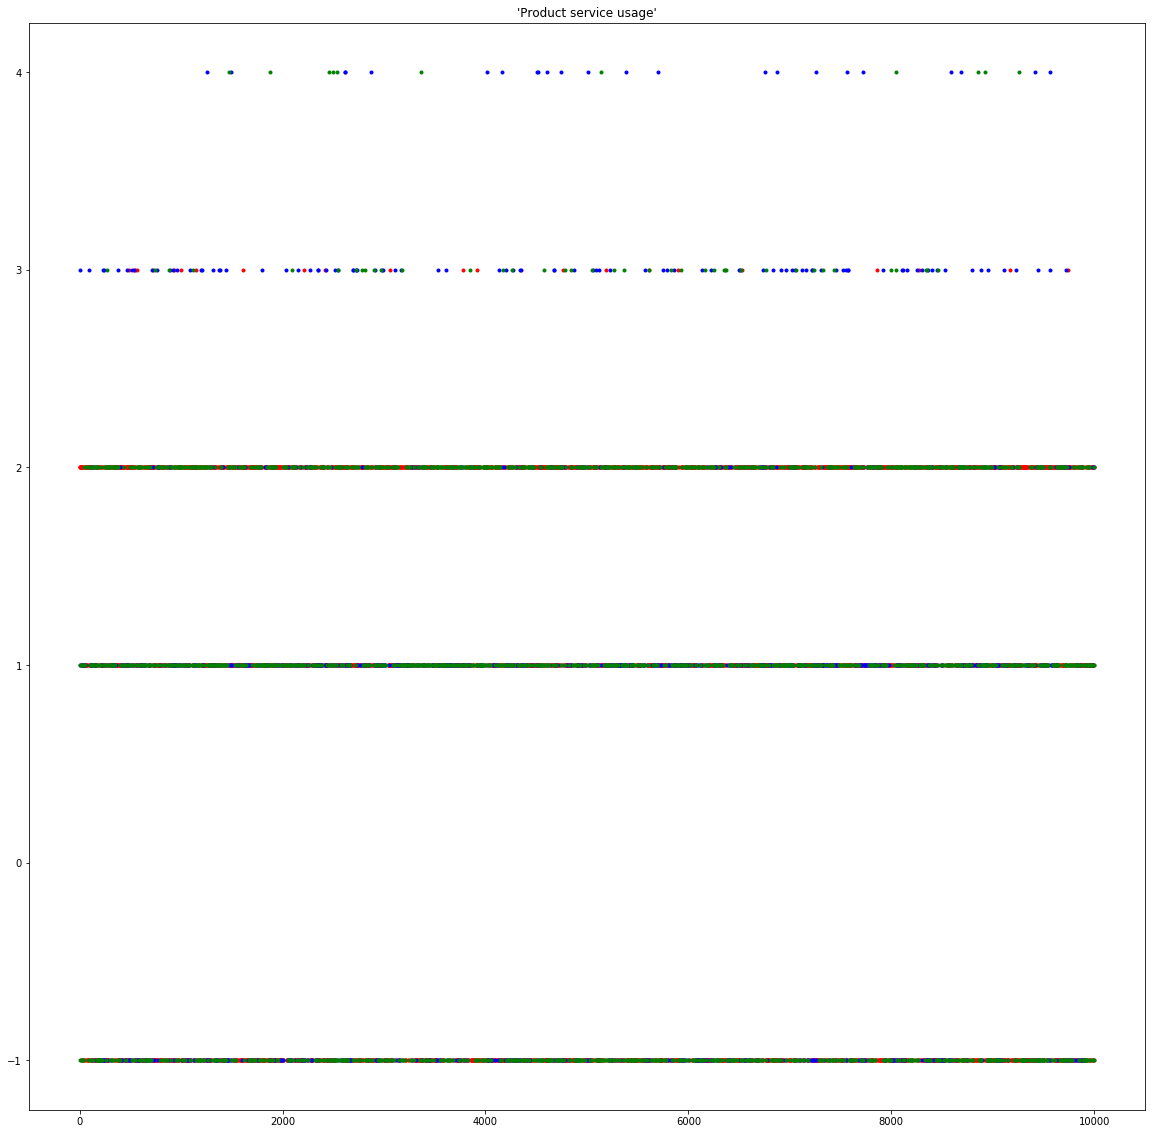

'Pay a monthly fee by credit card'


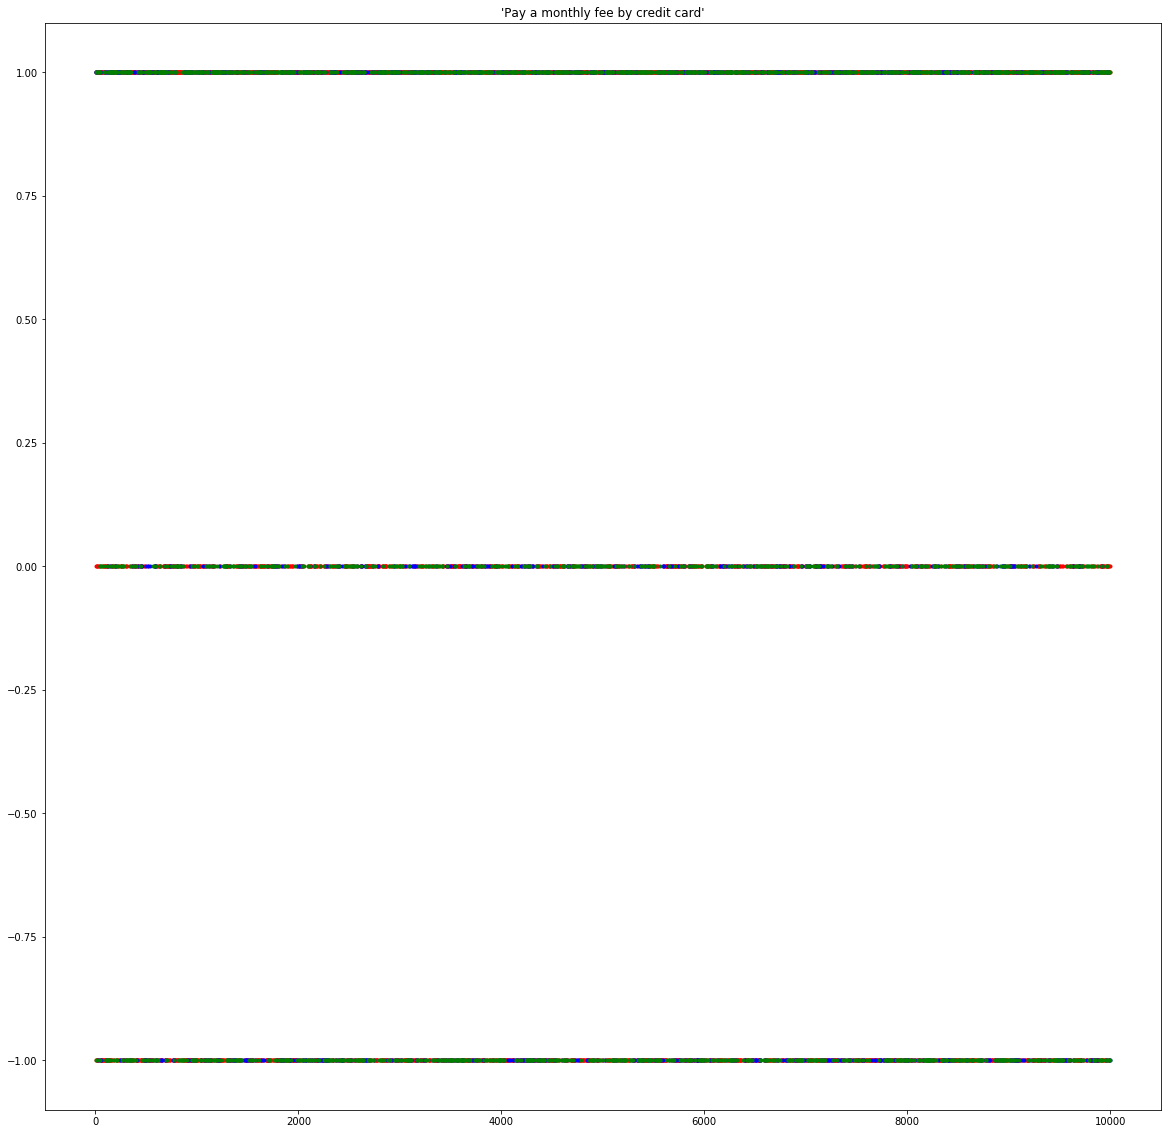

'Active user'


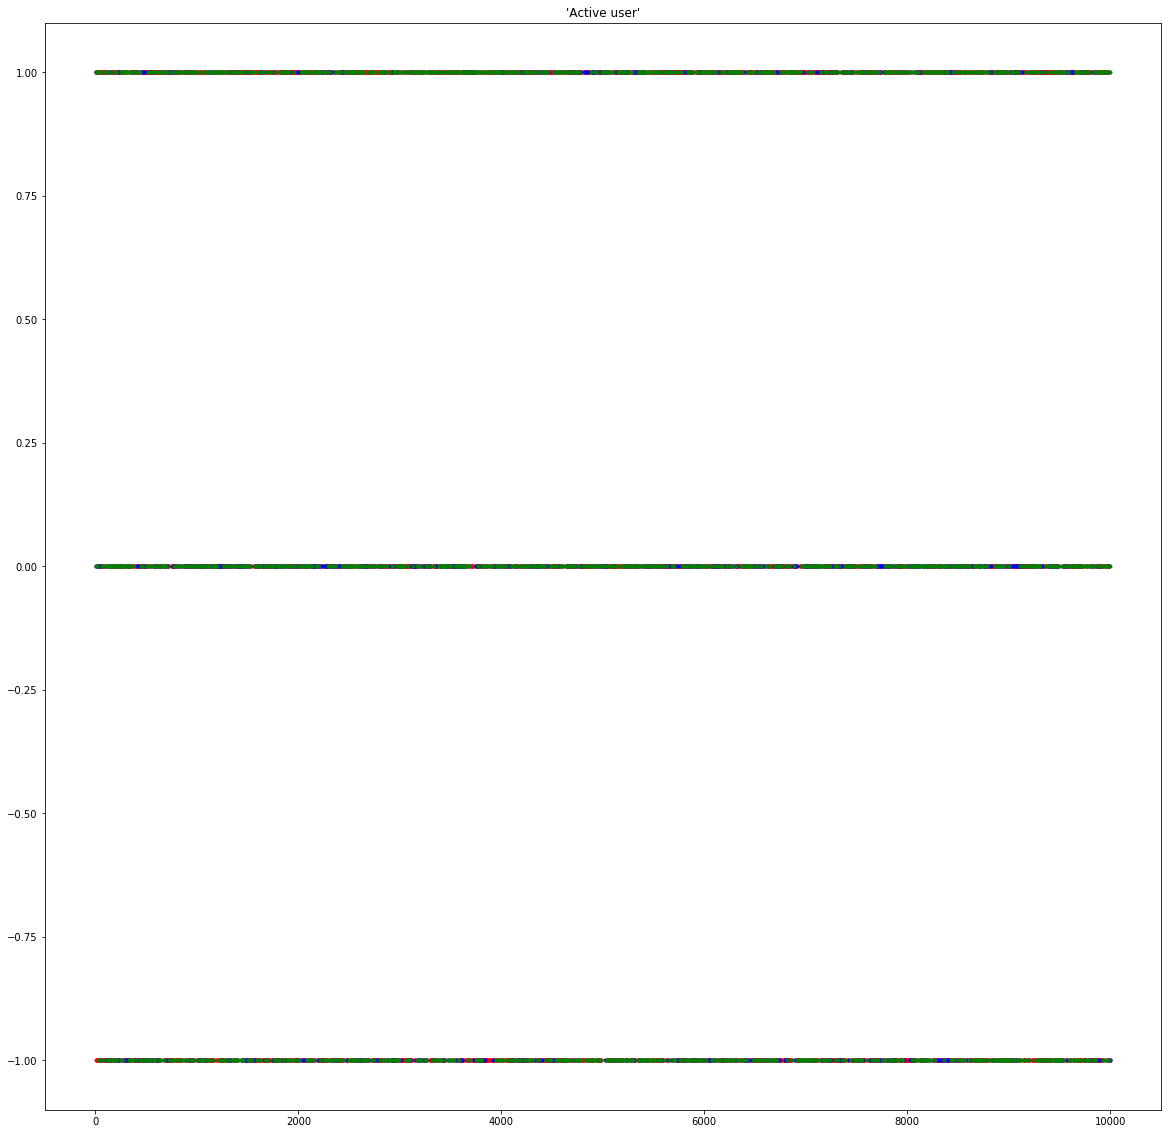

' Estimated salary'
' Estimated salary'


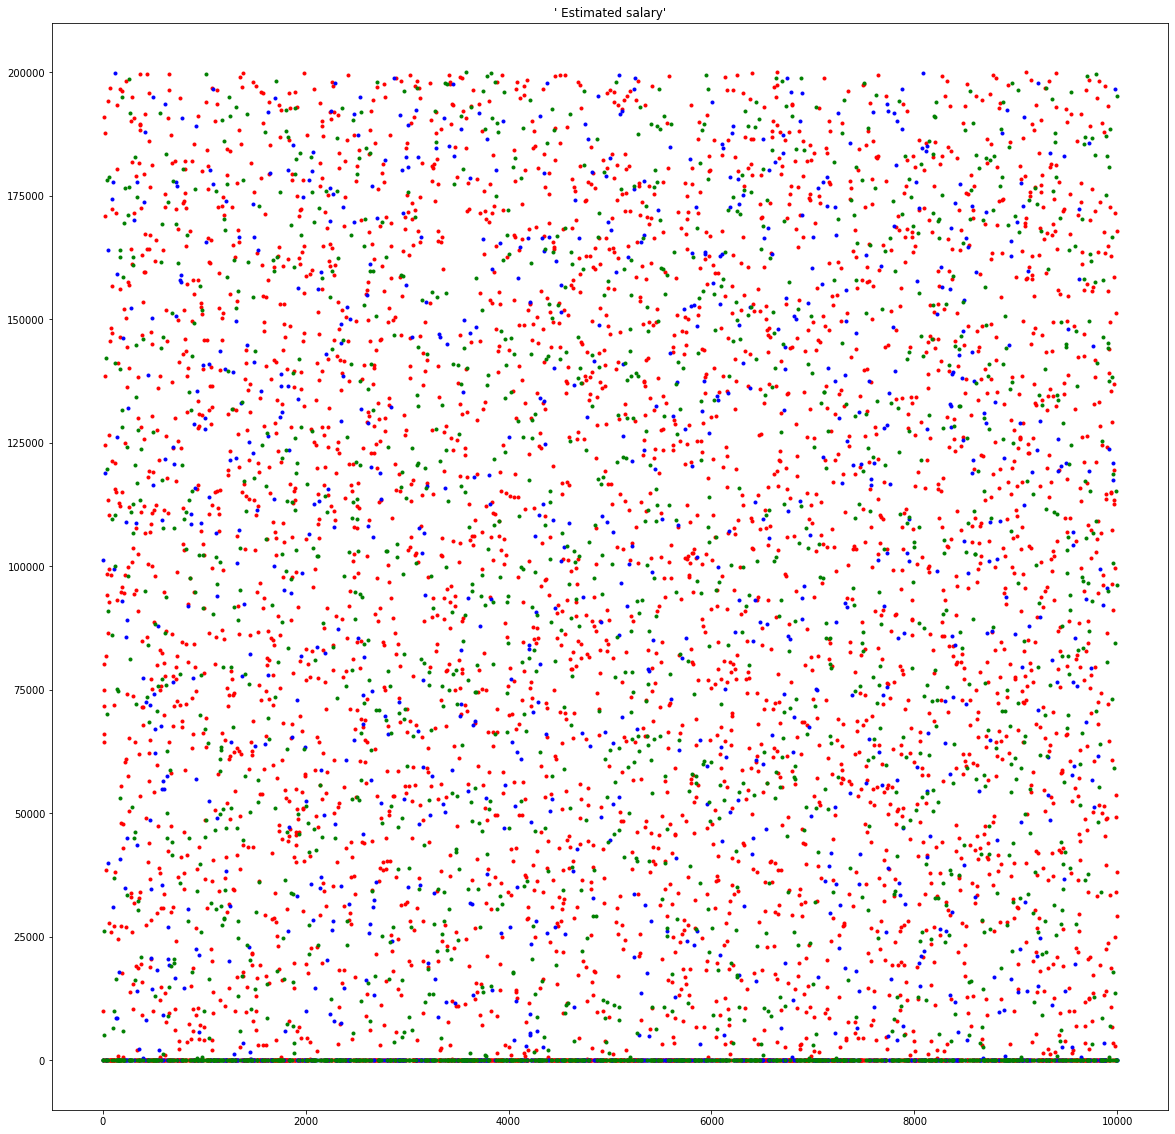

In [171]:
%matplotlib inline
import matplotlib.pyplot as plt

i = 0
for column in df_training_0.columns:
    print(column)
    i += 1
    if column in ["'Point balance'", "' Estimated salary'"]:
        print(column)
        df_training_0[column] = df_training_0[column].astype(float)
        df_training_1[column] = df_training_1[column].astype(float)
        df_test[column] = df_test[column].astype(float)
        
    else:
        df_training_0[column] = df_training_0[column].astype(int)
        df_training_1[column] = df_training_1[column].astype(int)
        df_test[column] = df_test[column].astype(int)
    
    
    plt.figure(figsize=(20,20))
    plt.plot(list(df_training_0.index), df_training_0.loc[:, column],'r.')

    plt.plot(list(df_training_1.index), df_training_1.loc[:, column],'b.')
    
    plt.plot(list(df_test.index), df_test.loc[:, column],'g.')
    plt.title(column)
    plt.show()